Import libraries CSVs for further research:

In [1]:
# dataframes
import pandas as pd

# statistical analysis
import numpy as np
import math
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import preprocessing

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df_2015 = pd.read_csv('MOD2DataCleaned_datacleaned2.csv') #pre-cleaned data
df_history = pd.read_csv('market_trend.csv') #2005 to 2020 housing trends
df_link = pd.read_csv('light_rail.csv') #light right data

/Users/joesanders/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2,3,4,5,6,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Confirm DF Shapes

In [2]:
display(df_2015.shape)
display(df_history.shape)
display(df_link.shape)

(15762, 24)

(66382, 12)

(55, 8)

In [20]:
df_link

,Unnamed: 0,Zip Code,Is Open,Open,Is Started,Construction Started,Is Announced,Announced
0,Beacon Hill,98144.0,True,2009,True,2002.0,True,1996
1,Columbia City,98108.0,True,2009,True,2002.0,True,1996
2,International District/Chinatown,98104.0,True,2009,True,2002.0,True,1996
3,Mount Baker,98144.0,True,2009,True,2002.0,True,1996
4,Othello,98118.0,True,2009,True,2002.0,True,1996
5,Pioneer Square,98104.0,True,2009,True,2002.0,True,1996
6,Rainier Beach,98118.0,True,2009,True,2002.0,True,1996
7,SeaTac/Airport,98188.0,True,2009,True,2002.0,True,1996
8,SODO,98134.0,True,2009,True,2002.0,True,1996
9,Stadium,98134.0,True,2009,True,2002.0,True,1996


In [19]:
df_link['Zip Code'].unique()

array([98144., 98108., 98104., 98118., 98188., 98134., 98101., 98102.,
       98195., 98125., 98115., 98105., 98005., 98004., 98040., 98052.,
       98003., 98032., 98133.,    nan])

In [3]:
df_2015.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'season', 'renovated',
       'basement'],
      dtype='object')

In [4]:
sqft_living_var = df_2015['sqft_living']-df_2015['sqft_living15']
sqft_lot_var = df_2015['sqft_lot']-df_2015['sqft_lot15']

In [12]:
sqft_living_var

0        880
1        600
2       -120
3        660
4       -523
        ... 
15757    -20
15758      0
15759    480
15760      0
15761      0
Length: 15762, dtype: int64

In [5]:
df_2015['sqft_living_var'] = preprocessing.normalize(sqft_living_var)

ValueError: Expected 2D array, got 1D array instead:
array=[ 880.  600. -120. ...  480.    0.    0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
df_2015.head()

Chi-Sqaure Analysis

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
fit_X = df_2015[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
                 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
                 'sqft_living15', 'sqft_lot15', 'month', 'renovated','basement']] 
fit_y = df_2015['price'] 
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(fit_X,fit_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(fit_X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs         Score
3        sqft_lot  2.649205e+08
15     sqft_lot15  1.401373e+08
12   yr_renovated  6.067438e+06
2     sqft_living  4.026721e+06
9      sqft_above  3.221990e+06
10  sqft_basement  3.024014e+06
14  sqft_living15  1.973826e+06
6            view  1.245427e+04
5      waterfront  4.732805e+03
16          month  4.251278e+03


We can also run a correlation heat map:

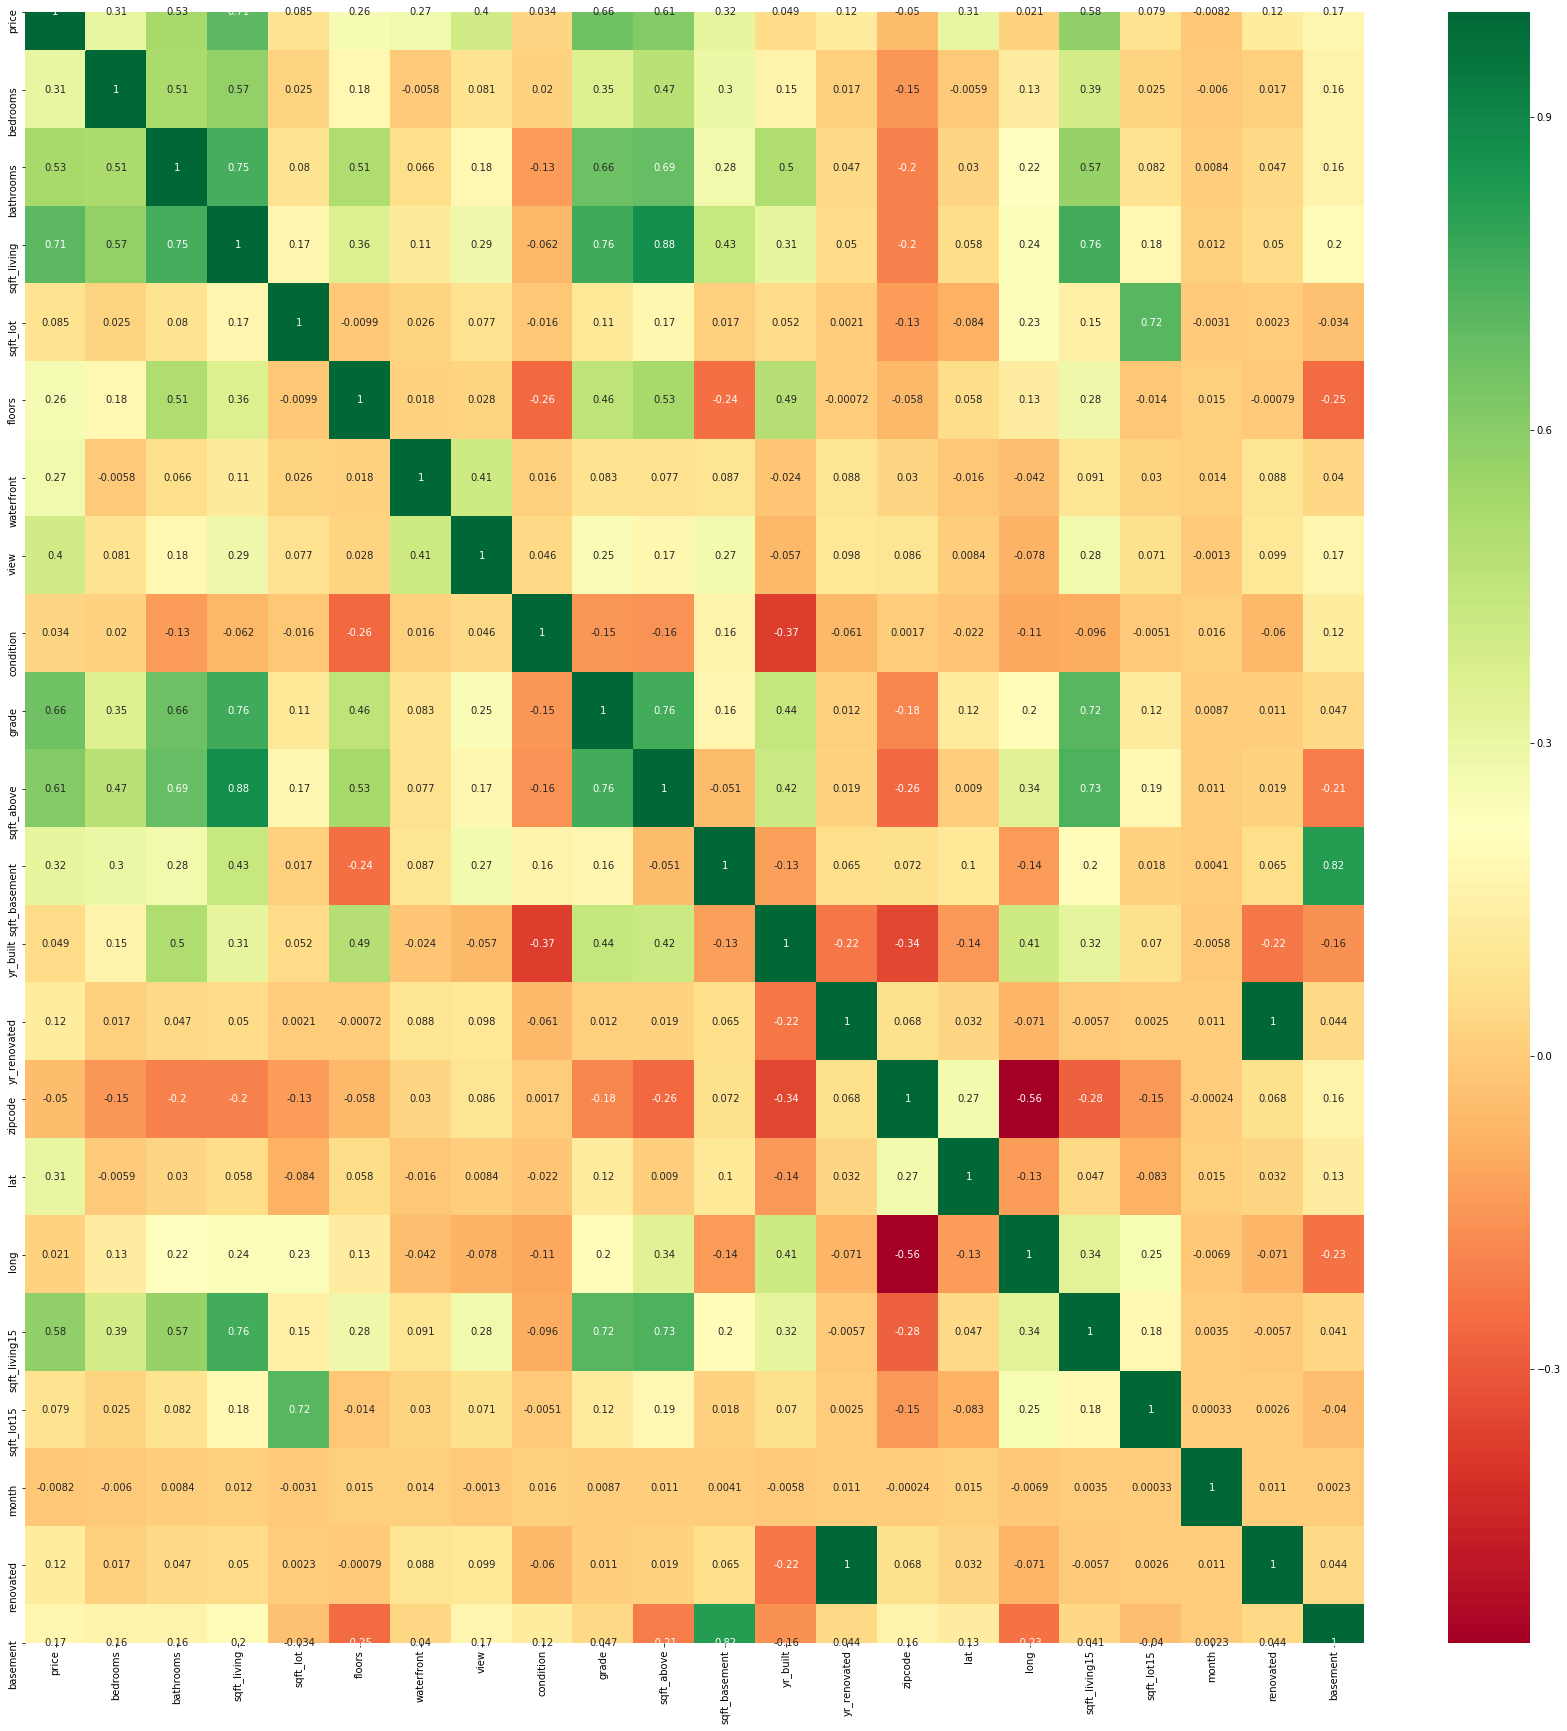

In [21]:
corrmat = df_2015.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(df_2015[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
Train Model

In [ ]:
X = df_concat[['as_wins','as_lipsync_wins','os_as_age_gap','as_highs']].values
y = df_concat[['as_placement']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
Determine Model Accuracy

In [ ]:
SVC_model = svm.SVC(random_state=0)
SVC_model.fit(X_train, y_train.ravel())
SVC_prediction = SVC_model.predict(X_test)
print("Support Vector Machine Accuracy:", accuracy_score(SVC_prediction, y_test))

GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train.ravel())
GNB_prediction = GNB_model.predict(X_test)
print("Gausian Naive Bayes Accuracy:", accuracy_score(GNB_prediction, y_test))

LR_model = LogisticRegression(max_iter=10000, random_state=0)
LR_model.fit(X_train, y_train.ravel())
LR_prediction = LR_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(LR_prediction, y_test))

RFC_model = RandomForestClassifier(random_state=0)
RandomForestClassifier()
RFC_model.fit(X_train, y_train.ravel())
RFC_prediction = RFC_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(RFC_prediction, y_test))

KNN_model = KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train, y_train.ravel())
KNN_prediction = KNN_model.predict(X_test)
print("K Nearest Neighbor Accuracy:", accuracy_score(KNN_prediction, y_test), 
      "(Note: Elbow Method for Optimal K was Used)")

LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train.ravel())
LDA_prediction = LDA_model.predict(X_test)
print("Linear Discriminant Analysis Accuracy:", accuracy_score(LDA_prediction, y_test))

In [ ]:
Set Final Model

In [ ]:
Final_model = LinearDiscriminantAnalysis()
Final_model.fit(X, y.ravel())